<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/Challenges-Kaggle/blob/main/House%20price%20prediction/House_Price_Prediction_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
numerical_columns = train_data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns_test = test_data.select_dtypes(include=['number']).columns.tolist()

In [ ]:
# create new features GarageAge and HouseAge then drop both

train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']
train_data['GarageAge'] = train_data['YrSold'] - train_data['GarageYrBlt']

test_data['HouseAge'] = test_data['YrSold'] - test_data['YearBuilt']
test_data['GarageAge'] = test_data['YrSold'] - test_data['GarageYrBlt']

'''train_data['HouseremodelAge'] = train_data['YrSold'] - train_data['YearRemodAdd']
test_data['HouseremodelAge'] = test_data['YrSold'] - test_data['YearRemodAdd']'''

# this just for refrence, i drop them a few cells down

# drop columns from the train data
#train_data.drop(columns=['YearBuilt', 'YrSold', 'MoSold'], axis=1, inplace=True)

# drop columns from the test data
#test_data.drop(columns=['GarageYrBlt', 'YrSold', 'MoSold'], axis=1, inplace=True)

"train_data['HouseremodelAge'] = train_data['YrSold'] - train_data['YearRemodAdd']\ntest_data['HouseremodelAge'] = test_data['YrSold'] - test_data['YearRemodAdd']"

In [ ]:
# for train
train_data['allporchsf'] = train_data['OpenPorchSF'] + train_data['3SsnPorch'] + train_data['EnclosedPorch'] + train_data['ScreenPorch'] + train_data['WoodDeckSF']
# for test
test_data['allporchsf'] = test_data['OpenPorchSF'] + test_data['3SsnPorch'] + test_data['EnclosedPorch'] + test_data['ScreenPorch'] + test_data['WoodDeckSF']

In [ ]:
test_ids = test_data["Id"].values

In [ ]:
# drop columns
columns_toDrop=['Id', 'MasVnrType', 'FireplaceQu',
                '3SsnPorch', 'ScreenPorch','EnclosedPorch','WoodDeckSF', 'OpenPorchSF',
                'YearBuilt', 'YrSold', 'MoSold', 'YearRemodAdd',
                'GarageArea', 'GarageQual',
                'PoolQC', 'PoolArea','MiscFeature', 'Alley', 'Fence',]
                #'BsmtFinSF2', 'BsmtHalfBath', 'LowQualFinSF', 'KitchenAbvGr', 'MiscVal'] worse results idk why

# drop columns from the train data
train_data.drop(columns=columns_toDrop, axis=1, inplace=True)

# drop columns from the test data
test_data.drop(columns=columns_toDrop, axis=1, inplace=True)

# Null values

In [ ]:
# after dropping some columns

numerical_columns = train_data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns_test = test_data.select_dtypes(include=['number']).columns.tolist()

len(numerical_columns), len(categorical_columns), len(numerical_columns_test)

(29, 36, 28)

In [ ]:
# fill none with the mean for numerical
train_data[numerical_columns] = train_data[numerical_columns].fillna(train_data[numerical_columns].mean())
# fill null with the mean for categorical
for column in categorical_columns:
    train_data[column] = train_data[column].fillna(train_data[column].mode()[0])


In [ ]:
# fill none with the mean for numerical
test_data[numerical_columns_test] = test_data[numerical_columns_test].fillna(train_data[numerical_columns_test].mean())
# fill null with the mean for categorical
for column in categorical_columns:
    test_data[column] = test_data[column].fillna(train_data[column].mode()[0])

In [ ]:
# perform better on the test file with the outliers
'''# remove the ouliers from train

original_row_count = train_data.shape[0]

for column in numerical_columns:
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.90)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    train_data = train_data[(train_data[column] >= lower_bound) & (train_data[column] <= upper_bound)]


new_row_count = train_data.shape[0]
rows_deleted = original_row_count - new_row_count'''

'# remove the ouliers from train\n\noriginal_row_count = train_data.shape[0]\n\nfor column in numerical_columns:\n    Q1 = train_data[column].quantile(0.25)\n    Q3 = train_data[column].quantile(0.90)\n    IQR = Q3 - Q1\n\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n\n    train_data = train_data[(train_data[column] >= lower_bound) & (train_data[column] <= upper_bound)]\n\n\nnew_row_count = train_data.shape[0]\nrows_deleted = original_row_count - new_row_count'

In [ ]:
# one hot encoding for the train data
train_data_encoded = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)
# one hot encoding for the test data
test_data_encoded = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error , mean_squared_error
X = train_data_encoded.drop(['SalePrice'],axis=1)
y = train_data_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=50)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
test_data_encoded = test_data_encoded.reindex(columns=X.columns, fill_value=0)

In [ ]:
test = scaler.transform(test_data_encoded)
test.shape

(234, 217)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, test_data_encoded.shape


((1022, 217), (1022,), (438, 217), (438,), (234, 217))

### LR

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_test_pred = LR.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_pred))

49069.321891511965

## Ridge

In [ ]:
ridge_params = {'alpha': [0.1, 1.0, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
y_pred_best_ridge = best_ridge.predict(test_data_encoded)
np.sqrt(mean_squared_error(y_test, best_ridge.predict(X_test)))

29281.838904660224

In [ ]:
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
y_pred_best_lasso = best_lasso.predict(test_data_encoded)
np.sqrt(mean_squared_error(y_test, best_lasso.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.507e+11, tolerance: 5.245e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.679e+11, tolerance: 5.489e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.603e+11, tolerance: 5.672e

41668.24727892363

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap = False, max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300)

'''param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

best_rf = random_search.best_estimator_
test_predictions = best_rf.predict(X_test_scaled)
'''

rf.fit(X_train, y_train)
test_predictions_RFR = rf.predict(test_data_encoded)
np.sqrt(mean_squared_error(   y_test,  rf.predict(X_test)    ))

28560.363636236136

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(learning_rate=0.05, n_estimators=1500, max_depth=3, min_child_weight=0, subsample=0.6, colsample_bytree=0.6)


# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05],
    'n_estimators': [1000, 1500],
    'max_depth': [3, 6],
    'min_child_weight': [0, 1],
    'subsample': [0.6, 0.7],
    'colsample_bytree': [0.6, 0.7]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the XGBoost model with the best parameters
best_xgb_model = xgb.XGBRegressor(**best_params)


xgb_model.fit(X, y)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

test_predictions_xgb = xgb_model.predict(test_data_encoded)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 0, 'n_estimators': 1000, 'subsample': 0.7}
Root Mean Squared Error: 5455.578264599697


Best Random State:
RandomState       46.000000
RMSE           19712.392809
Name: 46, dtype: float64


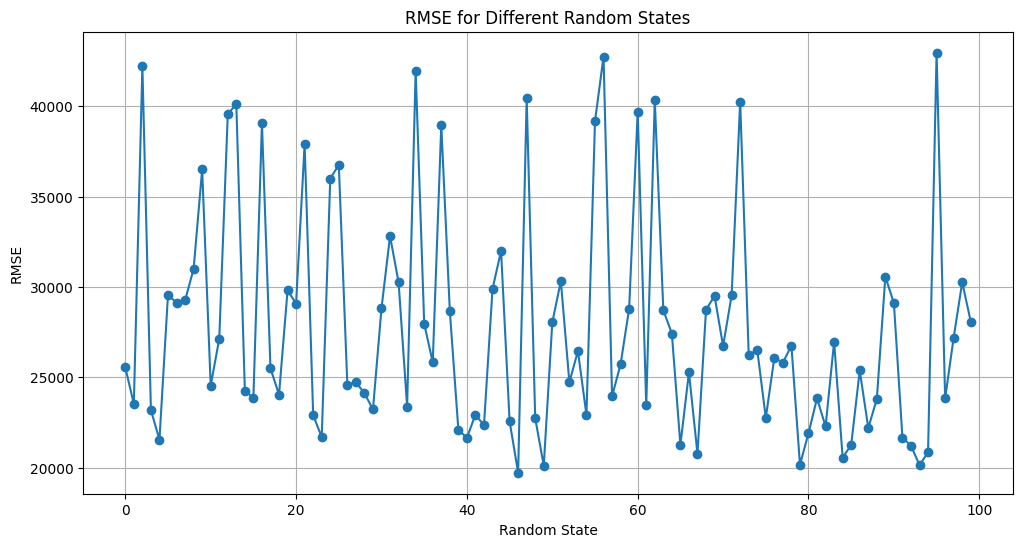

In [ ]:
random_states = range(0, 100)  # Testing random states from 0 to 99
results = []

for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    xgb_model = xgb.XGBRegressor(learning_rate=0.05, n_estimators=1500, max_depth=3, min_child_weight=0, subsample=0.6, colsample_bytree=0.6)


    # Test set prediction
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((random_state, rmse))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['RandomState', 'RMSE'])

# Find the best random state
best_random_state = results_df.loc[results_df['RMSE'].idxmin()]

print("Best Random State:")
print(best_random_state)

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results_df['RandomState'], results_df['RMSE'], marker='o')
plt.xlabel('Random State')
plt.ylabel('RMSE')
plt.title('RMSE for Different Random States')
plt.grid(True)
plt.show()

In [ ]:
predictions = pd.DataFrame({'Id': test_ids, 'SalePrice': test_predictions_xgb})
predictions.to_csv('submission5.csv', index=False)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error

# Calculate additional metrics
predictions_train = xgb_model.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
r2_train_RNN = r2_score(y_train, predictions_train)

print(f'Mean Absolute Error (Train): {mae_train}')
print(f'R-squared (Train): {r2_train_RNN}')
print(f'root mean squared error: {np.sqrt(mean_squared_error(y_train, predictions_train))}')

Mean Absolute Error (Train): 3110.4688187989236
R-squared (Train): 0.9975283721037532
root mean squared error: 4040.4566612620756


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error

# Calculate additional metrics
predictions_train = xgb_model.predict(X_test)
mae_train = mean_absolute_error(y_test, predictions_train)
r2_train_RNN = r2_score(y_test, predictions_train)

print(f'Mean Absolute Error (Train): {mae_train}')
print(f'R-squared (Train): {r2_train_RNN}')
print(f'root mean squared error: {np.sqrt(mean_squared_error(y_test, predictions_train))}')

Mean Absolute Error (Train): 14401.57252425799
R-squared (Train): 0.858870843234593
root mean squared error: 28080.09048522895


## Feature Engineering advanced

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


# removing outliers from SalePrice only
Q1 = train_data['SalePrice'].quantile(0.25)
Q3 = train_data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 -  IQR
upper_bound = Q3 +  IQR
train_data = train_data[(train_data['SalePrice'] >= lower_bound) & (train_data['SalePrice'] <= upper_bound)]
y = train_data['SalePrice']



numerical_columns = train_data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns_test = test_data.select_dtypes(include=['number']).columns.tolist()
train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']
train_data['GarageAge'] = train_data['YrSold'] - train_data['GarageYrBlt']
test_data['HouseAge'] = test_data['YrSold'] - test_data['YearBuilt']
test_data['GarageAge'] = test_data['YrSold'] - test_data['GarageYrBlt']
train_data['allporchsf'] = train_data['OpenPorchSF'] + train_data['3SsnPorch'] + train_data['EnclosedPorch'] + train_data['ScreenPorch'] + train_data['WoodDeckSF']

test_data['allporchsf'] = test_data['OpenPorchSF'] + test_data['3SsnPorch'] + test_data['EnclosedPorch'] + test_data['ScreenPorch'] + test_data['WoodDeckSF']
columns_toDrop=['Id', 'MasVnrType', 'FireplaceQu',
                '3SsnPorch', 'ScreenPorch','EnclosedPorch','WoodDeckSF', 'OpenPorchSF',
                'YearBuilt', 'YrSold', 'MoSold', 'YearRemodAdd',
                'GarageArea', 'GarageQual',
                'PoolQC', 'PoolArea','MiscFeature', 'Alley', 'Fence',]
                #'BsmtFinSF2', 'BsmtHalfBath', 'LowQualFinSF', 'KitchenAbvGr', 'MiscVal'] worse results idk why

train_data.drop(columns=columns_toDrop, axis=1, inplace=True)

test_data.drop(columns=columns_toDrop, axis=1, inplace=True)



numerical_columns = train_data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns_test = test_data.select_dtypes(include=['number']).columns.tolist()

len(numerical_columns), len(categorical_columns), len(numerical_columns_test)
# fill none with the mean for numerical

train_data[numerical_columns] = train_data[numerical_columns].fillna(train_data[numerical_columns].mean())

# fill null with the mean for categorical

for column in categorical_columns:
    train_data[column] = train_data[column].fillna(train_data[column].mode()[0])


test_data[numerical_columns_test] = test_data[numerical_columns_test].fillna(train_data[numerical_columns_test].mean())


# select columns with medium corr
train_data = train_data[['Neighborhood', 'OverallQual', 'ExterQual', 'Foundation', 'BsmtQual' ,'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'allporchsf', 'HouseAge', 'GarageAge', 'MSZoning', 'LotFrontage', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'HeatingQC', '2ndFlrSF', 'SaleCondition', 'SaleType', 'SalePrice']]
test_data = test_data[['Neighborhood', 'OverallQual', 'ExterQual', 'Foundation', 'BsmtQual' ,'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'allporchsf', 'HouseAge', 'GarageAge', 'MSZoning', 'LotFrontage', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'HeatingQC', '2ndFlrSF', 'SaleCondition', 'SaleType']]

numerical_columns = train_data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns_test = test_data.select_dtypes(include=['number']).columns.tolist()

y = train_data['SalePrice']

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encodings = encoder.fit_transform(train_data[categorical_columns])
encodings_df = pd.DataFrame(encodings, columns=encoder.get_feature_names_out())
train_data.reset_index(drop=True, inplace=True)
train = pd.concat([train_data, encodings_df], axis=1 )
train  = train.drop(categorical_columns, axis=1)
encoding_test = encoder.transform(test_data[categorical_columns])
encoding_test = pd.DataFrame(encoding_test, columns=encoder.get_feature_names_out())
test = pd.concat([test_data, encoding_test], axis=1 )
test = test.drop(categorical_columns, axis=1)


# for column in categorical_columns:
#     test_data[column] = test_data[column].fillna(train_data[column].mode()[0])
# train_data_encoded = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)

# test_data_encoded = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)

from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error , mean_squared_error


train = train.drop(['SalePrice'],axis=1)


# X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3,random_state=66)
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2,random_state=20)



In [ ]:
# # this cell just a connector that make standarization (optional)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)
# test = scaler.transform(test)

In [ ]:
best_xgb_model = best_xgb_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error

# Calculate additional metrics
predictions_train = best_xgb_model.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
r2_train_RNN = r2_score(y_train, predictions_train)

print(f'Mean Absolute Error (Train): {mae_train}')
print(f'R-squared (Train): {r2_train_RNN}')
print(f'root mean squared error: {np.sqrt(mean_squared_error(y_train, predictions_train))}')

Mean Absolute Error (Train): 4140.73367836718
R-squared (Train): 0.9886597469452746
root mean squared error: 5388.159662642373


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, test_data_encoded.shape

((1071, 127), (1071,), (268, 127), (268,), (234, 217))

In [ ]:
# Calculate additional metrics
predictions_test = best_xgb_model.predict(X_test)
mae_test = mean_absolute_error(y_test, predictions_test)
r2_train_RNN = r2_score(y_test, predictions_test)

print(f'Mean Absolute Error (test): {mae_train}')
print(f'R-squared (test): {r2_train_RNN}')
print(f'root mean squared error: {np.sqrt(mean_squared_error(y_test, predictions_test))}')

Mean Absolute Error (test): 4140.73367836718
R-squared (test): 0.8518962021761488
root mean squared error: 21112.894514553533


## more advanced features

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


# #outliers
Q1 = train_data['SalePrice'].quantile(0.25)
Q3 = train_data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 -  IQR
upper_bound = Q3 +  IQR
train_data = train_data[(train_data['SalePrice'] >= lower_bound) & (train_data['SalePrice'] <= upper_bound)]
y = train_data['SalePrice']

numerical_columns = train_data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns_test = test_data.select_dtypes(include=['number']).columns.tolist()
train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']
train_data['GarageAge'] = train_data['YrSold'] - train_data['GarageYrBlt']
test_data['HouseAge'] = test_data['YrSold'] - test_data['YearBuilt']
test_data['GarageAge'] = test_data['YrSold'] - test_data['GarageYrBlt']
train_data['allporchsf'] = train_data['OpenPorchSF'] + train_data['3SsnPorch'] + train_data['EnclosedPorch'] + train_data['ScreenPorch'] + train_data['WoodDeckSF']

test_data['allporchsf'] = test_data['OpenPorchSF'] + test_data['3SsnPorch'] + test_data['EnclosedPorch'] + test_data['ScreenPorch'] + test_data['WoodDeckSF']
columns_toDrop=['Id', 'MasVnrType', 'FireplaceQu',
                '3SsnPorch', 'ScreenPorch','EnclosedPorch','WoodDeckSF', 'OpenPorchSF',
                'YearBuilt', 'YrSold', 'MoSold', 'YearRemodAdd',
                'GarageArea', 'GarageQual',
                'PoolQC', 'PoolArea','MiscFeature', 'Alley', 'Fence',]
                #'BsmtFinSF2', 'BsmtHalfBath', 'LowQualFinSF', 'KitchenAbvGr', 'MiscVal'] worse results idk why

train_data.drop(columns=columns_toDrop, axis=1, inplace=True)

test_data.drop(columns=columns_toDrop, axis=1, inplace=True)

numerical_columns = train_data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns_test = test_data.select_dtypes(include=['number']).columns.tolist()

len(numerical_columns), len(categorical_columns), len(numerical_columns_test)
# fill none with the mean for numerical

train_data[numerical_columns] = train_data[numerical_columns].fillna(train_data[numerical_columns].mean())

# fill null with the mean for categorical

for column in categorical_columns:
    train_data[column] = train_data[column].fillna(train_data[column].mode()[0])


test_data[numerical_columns_test] = test_data[numerical_columns_test].fillna(train_data[numerical_columns_test].mean())

train_data['BsmtExposure']=train_data['BsmtExposure'].replace({'NA':1 , 'No':2 , 'Mn':3 , 'Av':4, 'Gd':5})
test_data['BsmtExposure']=test_data['BsmtExposure'].replace({'NA':1 , 'No':2 , 'Mn':3 , 'Av':4, 'Gd':5})

train_data['BsmtQual']=train_data['BsmtQual'].replace({'NA':1 , 'Po':2 , 'Fa':3 , 'TA':4, 'Gd':5, 'Ex':6,})
test_data['BsmtQual']=test_data['BsmtQual'].replace({'NA':1 , 'Po':2 , 'Fa':3 , 'TA':4, 'Gd':5, 'Ex':6, })
train_data['SaleCondition']=train_data['SaleCondition'].replace({ 'AdjLand':1 , 'Alloca':2 , 'Family':3 , 'Abnorml':4, 'Normal':5, 'Partial':6} )
test_data['SaleCondition']=test_data['SaleCondition'].replace({ 'AdjLand':1 , 'Alloca':2 , 'Family':3 , 'Abnorml':4, 'Normal':5, 'Partial':6})
train_data['KitchenQual']=train_data['KitchenQual'].replace({ 'Po':1 , 'Fa':2 , 'TA':3 , 'Gd':4, 'Ex':5 } )
test_data['KitchenQual']=test_data['KitchenQual'].replace({ 'Po':1 , 'Fa':2 , 'TA':3 , 'Gd':4, 'Ex':5 })
train_data['CentralAir']=train_data['CentralAir'].replace({'N':0 , 'Y':1 })
test_data['CentralAir']=test_data['CentralAir'].replace({'N':0 , 'Y':1 })
train_data['ExterQual']=train_data['ExterQual'].replace({'Po':1 , 'Fa':2 , 'TA':3 , 'Gd':4, 'Ex':5 })
test_data['ExterQual']=test_data['ExterQual'].replace({'Po':1 , 'Fa':2 , 'TA':3 , 'Gd':4,  'Ex':5 })
train_data['RoofStyle']=train_data['RoofStyle'].replace({'Mansard':1 , 'Gambrel':2 , 'Gable':3 , 'Flat':4, 'Shed':5, 'Hip':6,})
test_data['RoofStyle']=test_data['RoofStyle'].replace({'Mansard':1 , 'Gambrel':2 , 'Gable':3 , 'Flat':4, 'Shed':5, 'Hip':6, })


#med corr
train_data = train_data[['RoofStyle','CentralAir','Neighborhood', 'OverallQual', 'ExterQual', 'Foundation', 'BsmtQual' ,'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'allporchsf', 'HouseAge', 'GarageAge', 'MSZoning', 'LotFrontage', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'HeatingQC', '2ndFlrSF', 'SaleCondition', 'SaleType', 'SalePrice']]
test_data = test_data[['RoofStyle','CentralAir','Neighborhood', 'OverallQual', 'ExterQual', 'Foundation', 'BsmtQual' ,'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'allporchsf', 'HouseAge', 'GarageAge', 'MSZoning', 'LotFrontage', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'HeatingQC', '2ndFlrSF', 'SaleCondition', 'SaleType']]


numerical_columns = train_data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns_test = test_data.select_dtypes(include=['number']).columns.tolist()

y = train_data['SalePrice']

len(train_data)
#outliers inly
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encodings = encoder.fit_transform(train_data[categorical_columns])
encodings_df = pd.DataFrame(encodings, columns=encoder.get_feature_names_out())
train_data.reset_index(drop=True, inplace=True)
train = pd.concat([train_data, encodings_df], axis=1 )
train  = train.drop(categorical_columns, axis=1)
encoding_test = encoder.transform(test_data[categorical_columns])
encoding_test = pd.DataFrame(encoding_test, columns=encoder.get_feature_names_out())
test = pd.concat([test_data, encoding_test], axis=1 )
test = test.drop(categorical_columns, axis=1)


from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encodings = encoder.fit_transform(train_data[categorical_columns])
encodings_df = pd.DataFrame(encodings, columns=encoder.get_feature_names_out())

train = pd.concat([train_data, encodings_df], axis=1 )
train  = train.drop(categorical_columns, axis=1)

len(train)
from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error , mean_squared_error


train = train.drop(['SalePrice'],axis=1)


# X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3,random_state=66)
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.02,random_state=86)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)
# test = scaler.transform(test)

xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
xgb_model.fit(X_train, y_train)

# Calculate additional metrics
predictions_train = xgb_model.predict(X_train)
r2_train_RNN = r2_score(y_train, predictions_train)
print(f'root mean squared error Train: {np.sqrt(mean_squared_error(y_train, predictions_train))}')
print('')

predictions_test = xgb_model.predict(X_test)
r2_test_RNN = r2_score(y_test, predictions_test)
print(f'R-squared (Train): {r2_test_RNN}')
print(f'root mean squared error Train: {np.sqrt(mean_squared_error(y_test, predictions_test))}')
print('')


root mean squared error Train: 840.4647144523599

R-squared (Train): 0.795514442581173
root mean squared error Train: 22181.937570196682



## preprocessing - converting categories into ordinal numbers

In [ ]:
!pip install dython
from dython import nominal

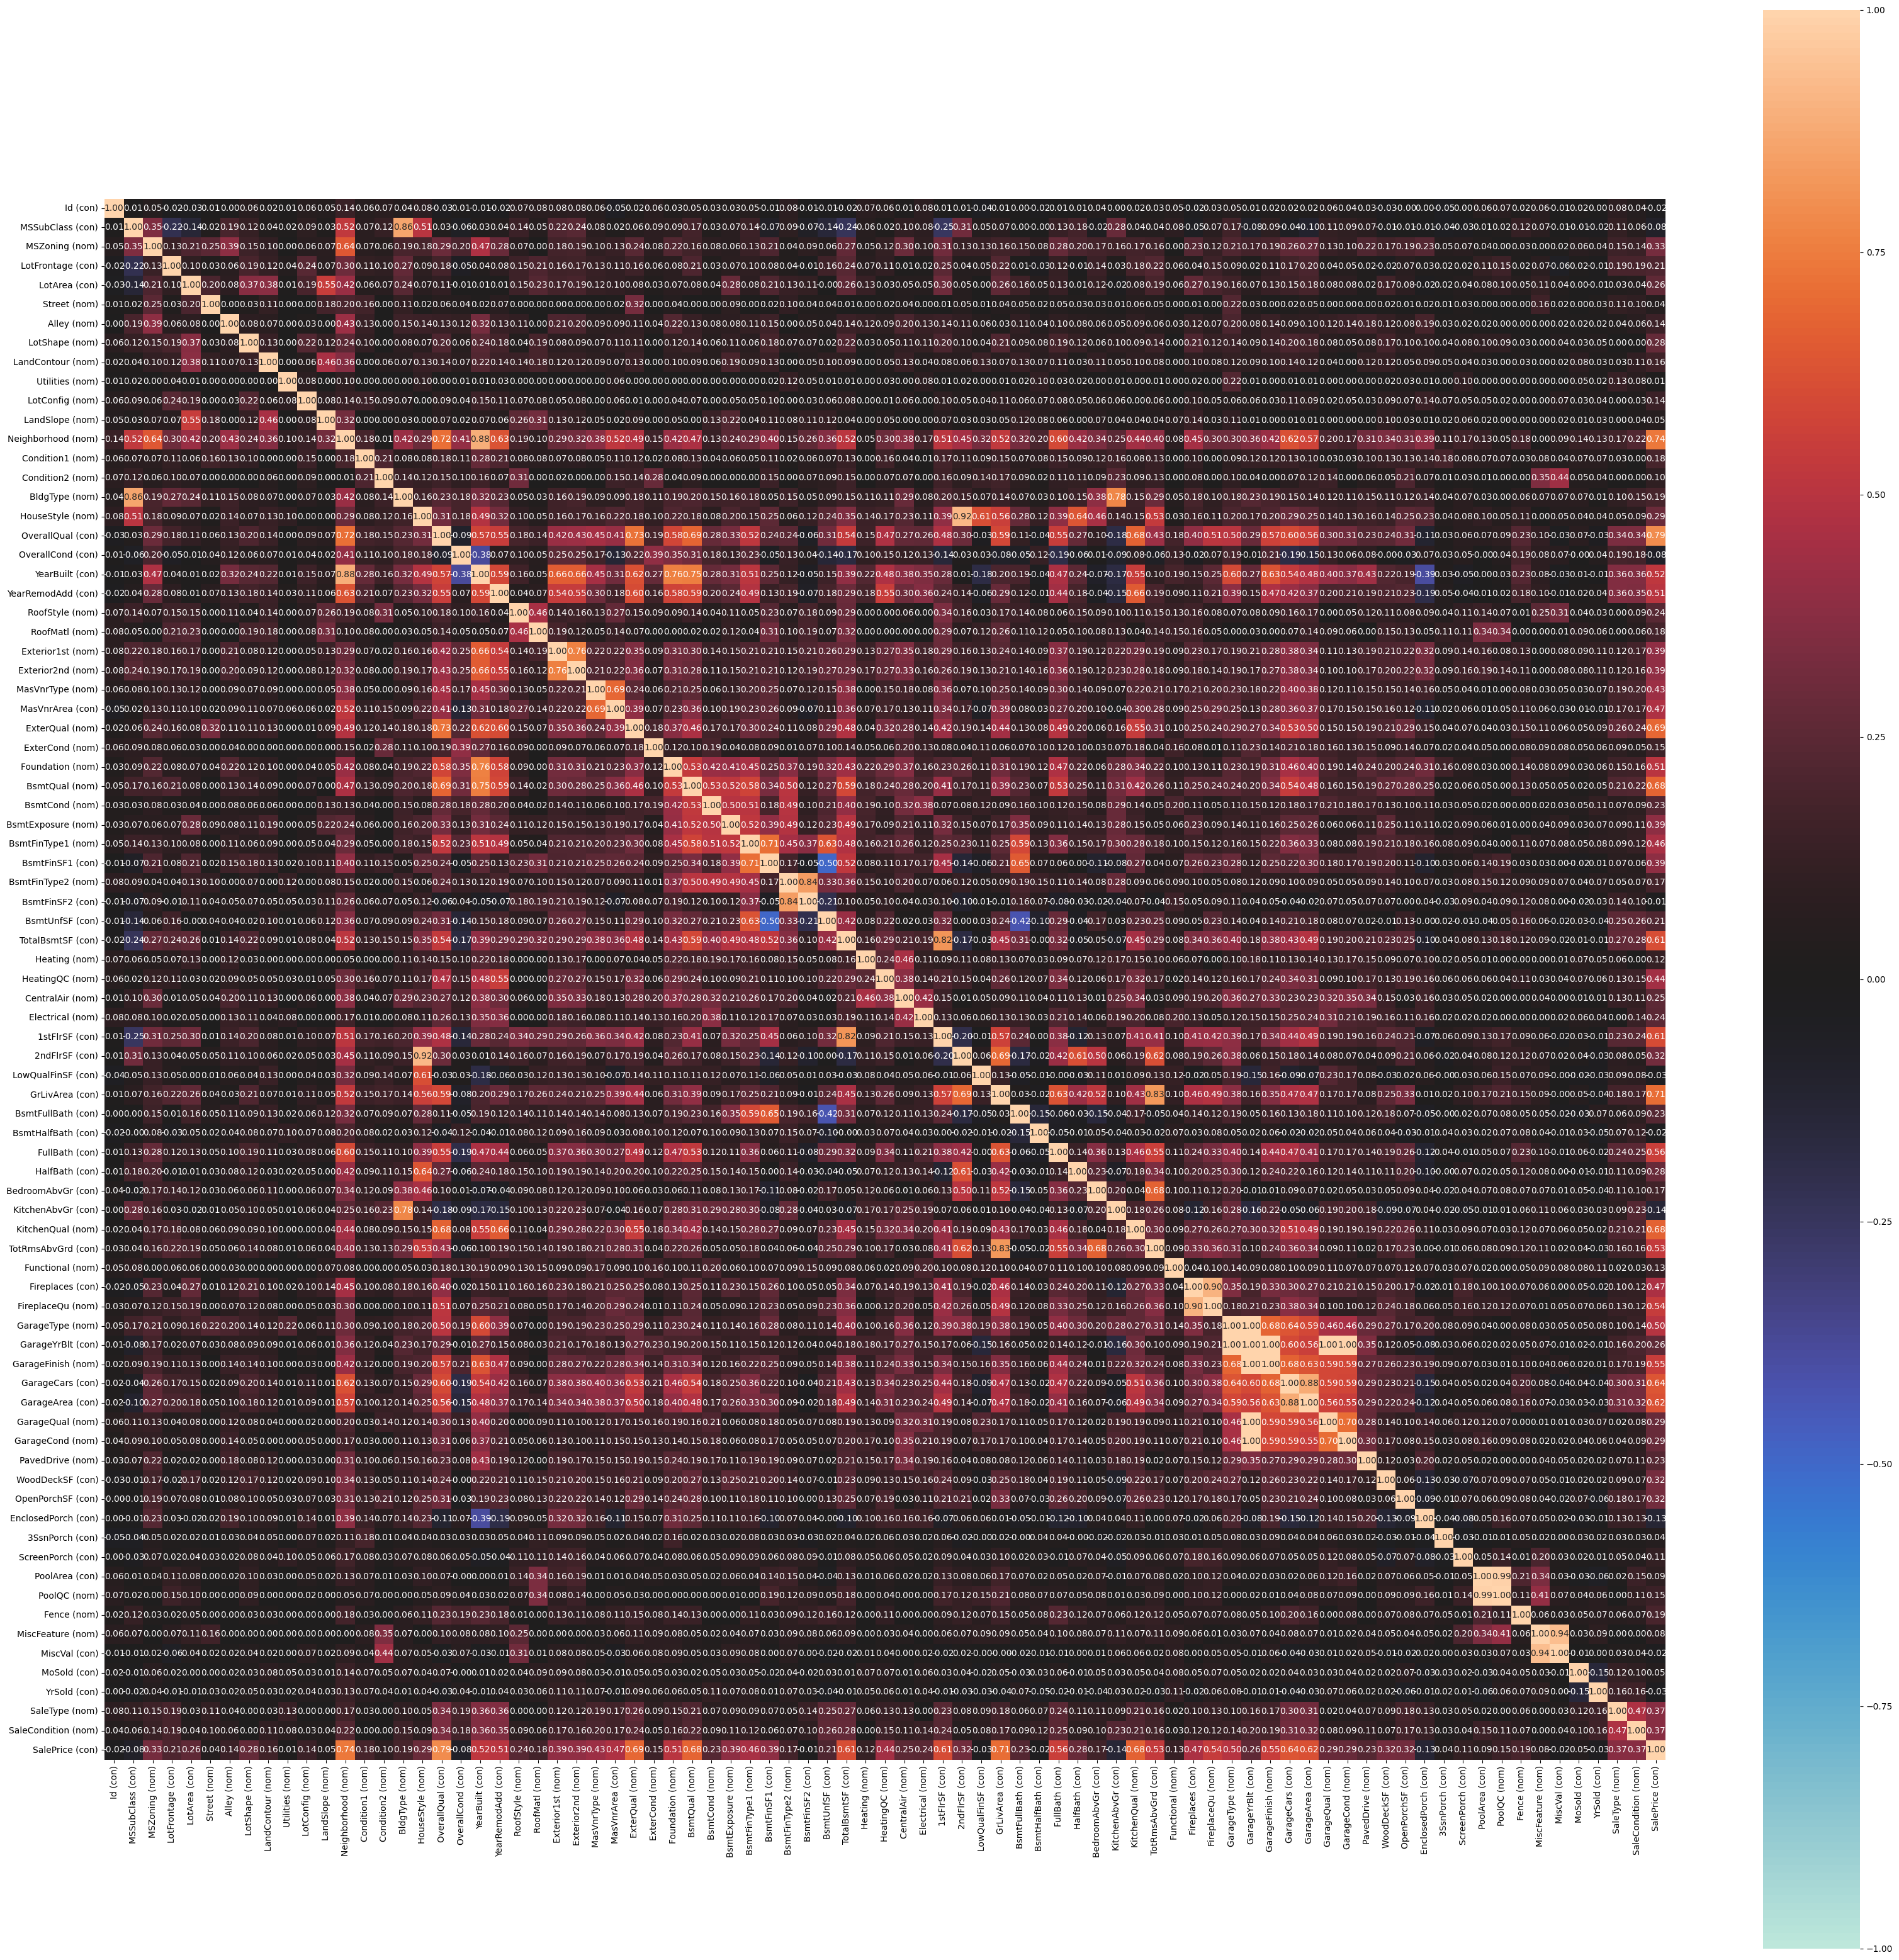

In [ ]:
nominal.associations(train_data,figsize=(40,40),mark_columns=True);

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


# create new features GarageAge and HouseAge then drop both

train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']
train_data['GarageAge'] = train_data['YrSold'] - train_data['GarageYrBlt']
test_data['HouseAge'] = test_data['YrSold'] - test_data['YearBuilt']
test_data['GarageAge'] = test_data['YrSold'] - test_data['GarageYrBlt']

'''train_data['HouseremodelAge'] = train_data['YrSold'] - train_data['YearRemodAdd']
test_data['HouseremodelAge'] = test_data['YrSold'] - test_data['YearRemodAdd']'''

# this just for refrence, i drop them a few cells down

# drop columns from the train data
train_data.drop(columns=['GarageYrBlt', 'YrSold', 'MoSold'], axis=1, inplace=True)

# drop columns from the test data
test_data.drop(columns=['GarageYrBlt', 'YrSold', 'MoSold'], axis=1, inplace=True)



# # for train
train_data['allporchsf'] = train_data['OpenPorchSF'] + train_data['3SsnPorch'] + train_data['EnclosedPorch'] + train_data['ScreenPorch'] + train_data['WoodDeckSF']
# # for test
test_data['allporchsf'] = test_data['OpenPorchSF'] + test_data['3SsnPorch'] + test_data['EnclosedPorch'] + test_data['ScreenPorch'] + test_data['WoodDeckSF']


# drop columns
columns_toDrop=['MasVnrType', 'FireplaceQu', '3SsnPorch', 'ScreenPorch','EnclosedPorch', 'PoolQC', 'PoolArea','MiscFeature', 'Alley', 'Fence', 'Utilities', 'RoofMatl', 'Heating', ]

# 'WoodDeckSF', 'OpenPorchSF','YearBuilt', 'YrSold', 'MoSold', 'YearRemodAdd', 'GarageQual'

# drop columns from the train data
train_data.drop(columns=columns_toDrop, axis=1, inplace=True)
# drop columns from the test data
test_data.drop(columns=columns_toDrop, axis=1, inplace=True)

# after dropping some columns
numerical_columns = train_data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns_test = test_data.select_dtypes(include=['number']).columns.tolist()

# fill none with the mean for numerical
for column in numerical_columns:
    train_data[column] = train_data[column].fillna(train_data[column].mean())
    if column != 'SalePrice':
        test_data[column] = test_data[column].fillna(train_data[column].mean())

# fill null with the mode for categorical
for column in categorical_columns:
    train_data[column] = train_data[column].fillna(train_data[column].mode()[0])
    test_data[column] = test_data[column].fillna(train_data[column].mode()[0])

In [ ]:
train_data['Street']=train_data['Street'].replace({'Grvl':1 , 'Pave':2})
test_data['Street']=test_data['Street'].replace({'Gravel':1 , 'Pave':2})

train_data['LotShape']=train_data['LotShape'].replace({'IR3':1 , 'IR2':2 , 'IR1':3 , 'Reg':4})
test_data['LotShape']=test_data['LotShape'].replace({'IR3':1 , 'IR2':2 , 'IR1':3 , 'Reg':4})

train_data['LandContour']=train_data['LandContour'].replace({'Lvl':1 , 'Bnk':2 , 'HLS':3 , 'Low':4})
test_data['LandContour']=test_data['LandContour'].replace({'Lvl':1 , 'Bnk':2 , 'HLS':3 , 'Low':4})

train_data['LotConfig']=train_data['LotConfig'].replace({'Inside':1 , 'Corner':2 , 'CulDSac':3 , 'FR2':4, 'FR3':5 })
test_data['LotConfig']=test_data['LotConfig'].replace({'Inside':1 , 'Corner':2 , 'CulDSac':3 , 'FR2':4, 'FR3':5 })

train_data['LandSlope']=train_data['LandSlope'].replace({'Gtl':1 , 'Mod':2 , 'Sev':3 })
test_data['LandSlope']=test_data['LandSlope'].replace({'Gtl':1 , 'Mod':2 , 'Sev':3 })

train_data['BldgType']=train_data['BldgType'].replace({'2fmCon':1 , 'Duplex':2 , 'Twnhs':3 , 'TwnhsE':4, '1Fam':5 })
test_data['BldgType']=test_data['BldgType'].replace({'2fmCon':1 , 'Duplex':2 , 'Twnhs':3 , 'TwnhsE':4, '1Fam':5 })

train_data['HouseStyle']=train_data['HouseStyle'].replace({'1.5Unf':1 , 'SFoyer':2 , '2.5Unf':3 , '1.5Fin':4, 'SLvl':5, '1Story':6, '2Story':7, '2.5Fin':8 })
test_data['HouseStyle']=test_data['HouseStyle'].replace({'1.5Unf':1 , 'SFoyer':2 , '2.5Unf':3 , '1.5Fin':4, 'SLvl':5, '1Story':6, '2Story':7, '2.5Fin':8 })

train_data['RoofStyle']=train_data['RoofStyle'].replace({'Mansard':1 , 'Gambrel':2 , 'Gable':3 , 'Flat':4, 'Shed':5, 'Hip':6,})
test_data['RoofStyle']=test_data['RoofStyle'].replace({'Mansard':1 , 'Gambrel':2 , 'Gable':3 , 'Flat':4, 'Shed':5, 'Hip':6, })

train_data['ExterQual']=train_data['ExterQual'].replace({'Po':1 , 'Fa':2 , 'TA':3 , 'Gd':4, 'Ex':5 })
test_data['ExterQual']=test_data['ExterQual'].replace({'Po':1 , 'Fa':2 , 'TA':3 , 'Gd':4,  'Ex':5 })

train_data['ExterCond']=train_data['ExterCond'].replace({'Po':1 , 'Fa':2 , 'TA':3 , 'Gd':4, 'Ex':5})
test_data['ExterCond']=test_data['ExterCond'].replace({'Po':1 , 'Fa':2 , 'TA':3 , 'Gd':4, 'Ex':5 })

train_data['BsmtQual']=train_data['BsmtQual'].replace({'NA':1 , 'Po':2 , 'Fa':3 , 'TA':4, 'Gd':5, 'Ex':6,})
test_data['BsmtQual']=test_data['BsmtQual'].replace({'NA':1 , 'Po':2 , 'Fa':3 , 'TA':4, 'Gd':5, 'Ex':6, })

train_data['BsmtCond']=train_data['BsmtCond'].replace({'NA':1 , 'Po':2 , 'Fa':3 , 'TA':4, 'Gd':5})
test_data['BsmtCond']=test_data['BsmtCond'].replace({'NA':1 , 'Po':2 , 'Fa':3 , 'TA':4, 'Gd':5})

train_data['BsmtExposure']=train_data['BsmtExposure'].replace({'NA':1 , 'No':2 , 'Mn':3 , 'Av':4, 'Gd':5})
test_data['BsmtExposure']=test_data['BsmtExposure'].replace({'NA':1 , 'No':2 , 'Mn':3 , 'Av':4, 'Gd':5})


train_data['BsmtFinType1']=train_data['BsmtFinType1'].replace({'NA':1 , 'Rec':2 , 'BLQ':3 , 'LwQ':4, 'ALQ':5, 'Unf':6 ,'GLQ': 7 })
test_data['BsmtFinType1']=test_data['BsmtFinType1'].replace({'NA':1 , 'Rec':2 , 'BLQ':3 , 'LwQ':4, 'ALQ':5, 'Unf':6 ,'GLQ': 7})

train_data['BsmtFinType2']=train_data['BsmtFinType2'].replace({'NA':1 ,'BLQ':2 , 'LwQ':3 , 'Rec':4 , 'Unf':5, 'ALQ':6, 'GLQ': 7 })
test_data['BsmtFinType2']=test_data['BsmtFinType2'].replace({'Na':1 , 'BLQ':2 , 'LwQ':3 , 'Rec':4 , 'Unf':5, 'ALQ':6, 'GLQ': 7})

train_data['HeatingQC']=train_data['HeatingQC'].replace({'Po':1 , 'Fa':2 , 'TA':3 , 'Gd':4, 'Ex':5 })
test_data['HeatingQC']=test_data['HeatingQC'].replace({'Po':1 , 'Fa':2 , 'TA':3 , 'Gd':4, 'Ex':5 })

train_data['CentralAir']=train_data['CentralAir'].replace({'N':0 , 'Y':1 })
test_data['CentralAir']=test_data['CentralAir'].replace({'N':0 , 'Y':1 })

train_data['Electrical']=train_data['Electrical'].replace({'Mix':0,'FuseP':1 , 'FuseF':2 , 'FuseA':3 , 'SBrkr':4 } )
test_data['Electrical']=test_data['Electrical'].replace({'Mix':0, 'FuseP':1 , 'FuseF':2 , 'FuseA':3 , 'SBrkr':4 })

train_data['KitchenQual']=train_data['KitchenQual'].replace({ 'Po':1 , 'Fa':2 , 'TA':3 , 'Gd':4, 'Ex':5 } )
test_data['KitchenQual']=test_data['KitchenQual'].replace({ 'Po':1 , 'Fa':2 , 'TA':3 , 'Gd':4, 'Ex':5 })

train_data['Functional']=train_data['Functional'].replace({ 'Sev':1 , 'Maj2':2 , 'Maj1':3 , 'Min2':4, 'Min1':5, 'Mod':6 ,'Typ':7 } )
test_data['Functional']=test_data['Functional'].replace({ 'Sev':1 , 'Maj2':2 , 'Maj1':3 , 'Min2':4, 'Min1':5, 'Mod':6,'Typ':7 })

train_data['GarageType']=train_data['GarageType'].replace({ 'CarPort':1,  'Detchd':2 , 'Basment':3 , '2Types':4 , 'Attchd':5, 'BuiltIn':6 } )
test_data['GarageType']=test_data['GarageType'].replace({'CarPort':1,  'Detchd':2 , 'Basment':3 , '2Types':4 , 'Attchd':5, 'BuiltIn':6})

train_data['GarageFinish']=train_data['GarageFinish'].replace({ 'NA':1,  'Unf':2 , 'RFn':3 , 'Fin':4  } )
test_data['GarageFinish']=test_data['GarageFinish'].replace({'NA':1,  'Unf':2 , 'RFn':3 , 'Fin':4 })

train_data['GarageCond']=train_data['GarageCond'].replace({ 'Po':1 , 'Fa':2 , 'TA':3 , 'Gd':4, 'Ex':5 } )
test_data['GarageCond']=test_data['GarageCond'].replace({'Po':1 , 'Fa':2 , 'TA':3 , 'Gd':4, 'Ex':5 })

train_data['PavedDrive']=train_data['PavedDrive'].replace({ 'N':1 , 'P':2 , 'Y':3 } )
test_data['PavedDrive']=test_data['PavedDrive'].replace({'N':1 , 'P':2 , 'Y':3})

train_data['SaleCondition']=train_data['SaleCondition'].replace({ 'AdjLand':1 , 'Alloca':2 , 'Family':3 , 'Abnorml':4, 'Normal':5, 'Partial':6} )
test_data['SaleCondition']=test_data['SaleCondition'].replace({ 'AdjLand':1 , 'Alloca':2 , 'Family':3 , 'Abnorml':4, 'Normal':5, 'Partial':6})

train_data['Foundation']=train_data['Foundation'].replace({ 'Slab':1 , 'BrkTil':2 , 'Stone':3 , 'CBlock':4, 'Wood':5, 'PConc':6} )
test_data['Foundation']=test_data['Foundation'].replace({ 'Slab':1 , 'BrkTil':2 , 'Stone':3 , 'CBlock':4, 'Wood':5, 'PConc':6})

train_data['MSZoning']=train_data['MSZoning'].replace({ 'A':1 , 'C (all)':2 , 'RH':3 , 'RM':4, 'I':5, 'RL':6, 'RP':7, 'FV':8 } )
test_data['MSZoning']=test_data['MSZoning'].replace({ 'A':1 , 'C (all)':2 , 'RH':3 , 'RM':4, 'I':5, 'RL':6, 'RP':7, 'FV':8 })


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
objects = (train_data.dtypes == 'object')
object_cols = list(objects[objects].index).copy()

encodings = encoder.fit_transform(train_data[object_cols])
encodings_df = pd.DataFrame(encodings, columns=encoder.get_feature_names_out())
train = pd.concat([train_data, encodings_df], axis=1 )
train  = train.drop(object_cols, axis=1)

encoding_test = encoder.transform(test_data[object_cols])
encoding_test = pd.DataFrame(encoding_test, columns=encoder.get_feature_names_out())
test = pd.concat([test_data, encoding_test], axis=1 )
test = test.drop(object_cols, axis=1)

# from sklearn.preprocessing import QuantileTransformer
# quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=123)
# train_numerical_trans = quantile_transformer.fit_transform(train[numerical_columns_test])
# test_numerical_trans = quantile_transformer.transform(test[numerical_columns_test])


# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# train_numerical_trans = scaler.fit_transform(train[numerical_columns_test])
# test_numerical_trans = scaler.transform(test[numerical_columns_test])

# train_numerical_trans = pd.DataFrame(train_numerical_trans, columns=numerical_columns_test)
# test_numerical_trans = pd.DataFrame(test_numerical_trans, columns=numerical_columns_test)
# train[numerical_columns_test] = train_numerical_trans[numerical_columns_test]
# test[numerical_columns_test] = test_numerical_trans[numerical_columns_test]

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
X = train.drop(['Id','SalePrice'],axis=1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=123)
test_ids = test["Id"].values
test.drop(['Id'],axis=1,  inplace=True)

In [ ]:
ridge_params = {'alpha': [0.1, 1.0, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
test_predictions_ridge = best_ridge.predict(test)
np.sqrt(mean_squared_error(y_test, best_ridge.predict(X_test)))

29387.208981121195

# F

In [ ]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

test_ids = test_data["Id"].values
numerical_columns = train_data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns_test = test_data.select_dtypes(include=['number']).columns.tolist()

# create new features GarageAge and HouseAge then drop both

train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']
train_data['GarageAge'] = train_data['YrSold'] - train_data['GarageYrBlt']

test_data['HouseAge'] = test_data['YrSold'] - test_data['YearBuilt']
test_data['GarageAge'] = test_data['YrSold'] - test_data['GarageYrBlt']

'''train_data['HouseremodelAge'] = train_data['YrSold'] - train_data['YearRemodAdd']
test_data['HouseremodelAge'] = test_data['YrSold'] - test_data['YearRemodAdd']'''

# this just for refrence, i drop them a few cells down

# drop columns from the train data
#train_data.drop(columns=['YearBuilt', 'YrSold', 'MoSold'], axis=1, inplace=True)

# drop columns from the test data
#test_data.drop(columns=['GarageYrBlt', 'YrSold', 'MoSold'], axis=1, inplace=True)

# for train
train_data['allporchsf'] = train_data['OpenPorchSF'] + train_data['3SsnPorch'] + train_data['EnclosedPorch'] + train_data['ScreenPorch'] + train_data['WoodDeckSF']


# for test
test_data['allporchsf'] = test_data['OpenPorchSF'] + test_data['3SsnPorch'] + test_data['EnclosedPorch'] + test_data['ScreenPorch'] + test_data['WoodDeckSF']

# drop columns



columns_toDrop=['Id', 'MasVnrType', 'FireplaceQu',
                '3SsnPorch', 'ScreenPorch','EnclosedPorch','WoodDeckSF', 'OpenPorchSF',
                'YearBuilt', 'YrSold', 'MoSold', 'YearRemodAdd',
                'GarageArea', 'GarageQual',
                'PoolQC', 'PoolArea','MiscFeature', 'Alley', 'Fence',]
                #'BsmtFinSF2', 'BsmtHalfBath', 'LowQualFinSF', 'KitchenAbvGr', 'MiscVal'] worse results idk why

# drop columns from the train data
train_data.drop(columns=columns_toDrop, axis=1, inplace=True)

# drop columns from the test data
test_data.drop(columns=columns_toDrop, axis=1, inplace=True)
# after dropping some columns

numerical_columns = train_data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns_test = test_data.select_dtypes(include=['number']).columns.tolist()

len(numerical_columns), len(categorical_columns), len(numerical_columns_test)
# fill none with the mean for numerical

train_data[numerical_columns] = train_data[numerical_columns].fillna(train_data[numerical_columns].mean())

# fill null with the mean for categorical

for column in categorical_columns:
    train_data[column] = train_data[column].fillna(train_data[column].mode()[0])
# fill none with the mean for numerical

test_data[numerical_columns_test] = test_data[numerical_columns_test].fillna(train_data[numerical_columns_test].mean())

# fill null with the mean for categorical

for column in categorical_columns:
    test_data[column] = test_data[column].fillna(train_data[column].mode()[0])
train_data_encoded = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)
from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error


X = train_data_encoded.drop(['SalePrice'],axis=1)
y = train_data_encoded['SalePrice']
test_data_encoded = test_data_encoded.reindex(columns=X.columns, fill_value=0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=50)




In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, test_data_encoded.shape

((1022, 217), (1022,), (438, 217), (438,), (234, 217))

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(learning_rate=0.05, n_estimators=1500, max_depth=3, min_child_weight=0, subsample=0.6, colsample_bytree=0.6)

xgb_model.fit(X, y)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

test_predictions_xgb = xgb_model.predict(test_data_encoded)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 5455.578264599697


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error

# Calculate additional metrics
predictions_train = xgb_model.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
r2_train_RNN = r2_score(y_train, predictions_train)

print(f'Mean Absolute Error (Train): {mae_train}')
print(f'R-squared (Train): {r2_train_RNN}')
print(f'root mean squared error: {np.sqrt(mean_squared_error(y_train, predictions_train))}')
print('')
print('')
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error

# Calculate additional metrics
predictions_train = xgb_model.predict(X_test)
mae_train = mean_absolute_error(y_test, predictions_train)
r2_train_RNN = r2_score(y_test, predictions_train)

print(f'Mean Absolute Error (test): {mae_train}')
print(f'R-squared (test): {r2_train_RNN}')
print(f'root mean squared error: {np.sqrt(mean_squared_error(y_test, predictions_train))}')

Mean Absolute Error (Train): 4185.068688080969
R-squared (Train): 0.9954331871461444
root mean squared error: 5460.959456295821


Mean Absolute Error (test): 4276.151862157534
R-squared (test): 0.9948516157186642
root mean squared error: 5455.578264599697


## adding features

In [ ]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
from  sklearn.ensemble import StackingRegressor

In [ ]:
X['SalePrice'] = y

In [ ]:
dff = pd.concat([X, test_data_encoded])
target = dff.iloc[:len(X)]['SalePrice']

In [ ]:
dff.drop(columns=['SalePrice'], inplace= True)

In [ ]:
xgb_params = {'max_depth': 4, 'learning_rate': 0.008, 'n_estimators': 3500, 'min_child_weight': 2, 'colsample_bytree': 0.2, 'subsample': 0.4, 'reg_alpha': 0.3, 'reg_lambda': 0.04}

xgbr = xgb.XGBRegressor(**xgb_params, random_state=42)

model = [
    ('ridge', Ridge(alpha=15)),
    ('XGB', xgbr),
]

stack = StackingRegressor(estimators=model, final_estimator=LinearRegression())

stack.fit(dff.iloc[:len(X)], np.log1p(target.values))

StackingRegressor(estimators=[('ridge', Ridge(alpha=15)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.2, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.008, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None, min_child_weight=2,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=3500, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=LinearRegression())

In [ ]:
len(test_ids)

234

In [ ]:
len(dff)

1694

In [ ]:
predict = stack.predict(dff)

In [ ]:
output = pd.DataFrame({
    'Id' : test_ids,
    'SalePrice' : np.exp(predict[len(X):])
})

output.to_csv('submission1913.csv' ,index=False)